In [8]:
# Use this to add the tag_tracking folder to python path for imports
import os, sys
tag_tracking_path = os.path.abspath(os.path.join('', './../..'))
sys.path.insert(0, tag_tracking_path)

# Import the tagsim functions
from tagsim.sim_cardiacmotion import get_random_heart
from tagsim.sim_fullmotion import get_full_motion_im

In [19]:
ke = 0.14  # DENSE encoding strength
basepath = '../image_db/' # Location of image files for background
use_gpu = True 

# Perform the data generation/simulation
res = get_random_heart(ke = ke,  use_gpu = use_gpu, basepath = basepath, mode='DENSE')

# Get the final phase cycled images from results
im_dense = res['all_im_pc']

In [25]:
import matplotlib.pyplot as plt
from save_gifs import save_gif, save_gif_windows

def save_anim(im, tag, clim = None):
    save_folder = './anims/{}/'.format(tag)
    os.makedirs(save_folder, exist_ok = True)

    for i_t in range(im.shape[0]):

        fig = plt.figure(figsize=[6,6])
        ax = fig.add_subplot(111)
        
        if clim is None:
            plt.imshow(im[i_t], cmap='gray', clim = [0,0.9*im.max()])
        else:
            plt.imshow(im[i_t], cmap='gray', clim = clim)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)

        plt.tight_layout()

        plt.savefig('{}/frame_{:03d}.png'.format(save_folder, i_t), dpi=200, bbox_inches='tight', pad_inches=0)
        if i_t == 0:
            plt.show()
        else:
            plt.close()

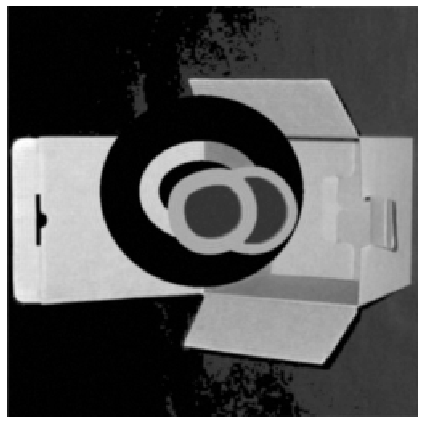

In [21]:
tag = '03_dense_mag'
save_folder = './anims/{}/'.format(tag)
save_anim(np.abs(im_dense), tag)
p0 = save_gif_windows(save_folder, save_folder = './anims/', save_name = '{}.gif'.format(tag), ww=256, framerate = 16)

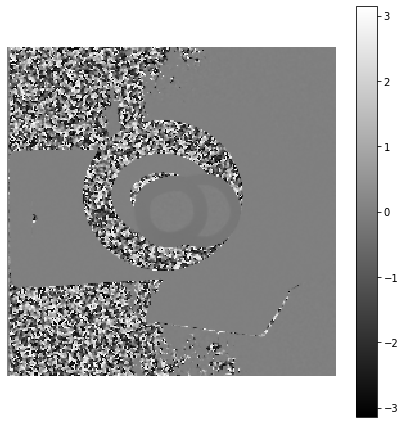

In [26]:
tag = '03_dense_phase'
save_folder = './anims/{}/'.format(tag)
save_anim(np.angle(im_dense), tag, clim = [-np.pi, np.pi])
p0 = save_gif_windows(save_folder, save_folder = './anims/', save_name = '{}.gif'.format(tag), ww=256, framerate = 16)

In [4]:
im_dense.shape

(25, 256, 256)

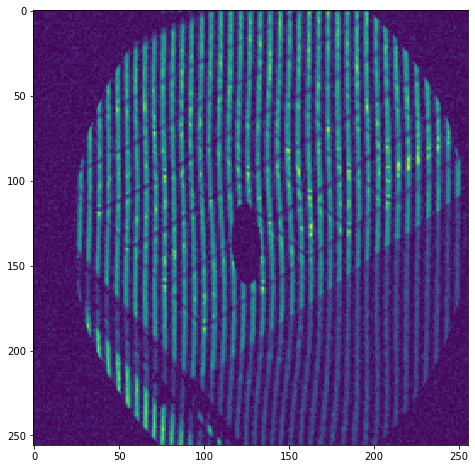

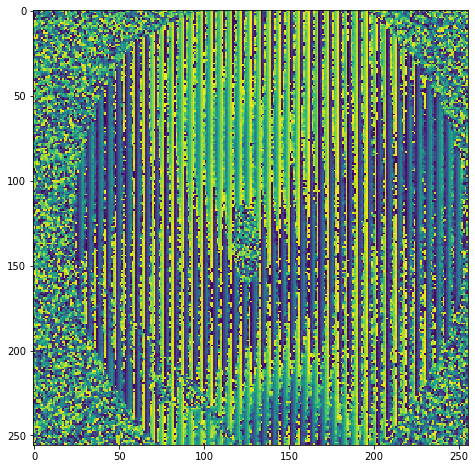

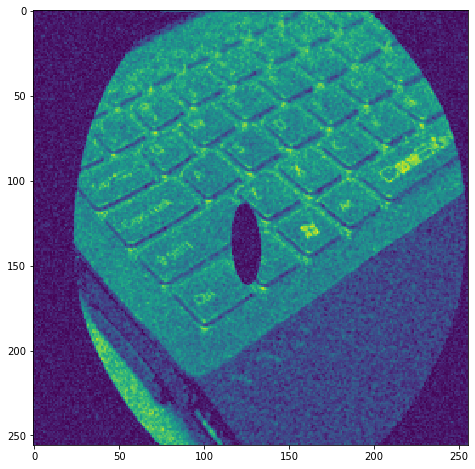

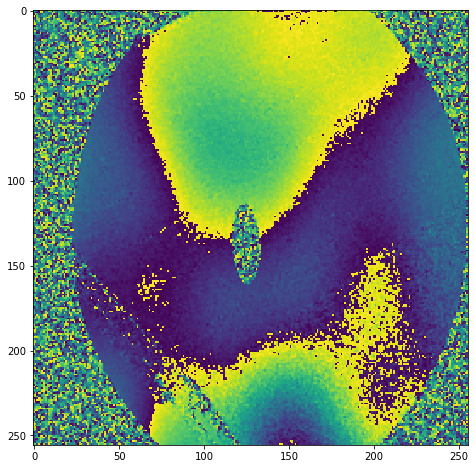

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from save_gifs import save_gif, save_gif_windows

i_t = 10

plt.figure(figsize=(8,8))
plt.imshow(np.abs(res['all_imc'][i_t]))
plt.figure(figsize=(8,8))
plt.imshow(np.angle(res['all_imc'][i_t]))

plt.figure(figsize=(8,8))
plt.imshow(np.abs(res['all_im_pc'][i_t]))
plt.figure(figsize=(8,8))
plt.imshow(np.angle(res['all_im_pc'][i_t]))